# CREDIT-CARD APPROVAL CAPSTONE PROJECT 

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the CSV files into dataframes
credit_data = pd.read_csv('Credit_card.csv')
label_data = pd.read_csv('Credit_card_label.csv')

# Merge the dataframes based on a common identifier, such as an ID or customer account number
credit= pd.merge(credit_data, label_data, on='Ind_ID')

In [3]:
credit

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0


## Data Analyse and dealing with the missing value and none value 

In [4]:
credit.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [6]:
credit['Annual_income']=credit['Annual_income'].fillna(credit['Annual_income'].mean())

In [7]:
credit['Birthday_count']=credit['Birthday_count'].fillna(credit['Birthday_count'].mean())

In [8]:
credit['GENDER'].fillna(credit['GENDER'].mode()[0],inplace =True)

In [9]:
credit['Type_Occupation'].fillna('unknown',inplace=True)

In [10]:
credit.isnull().sum()

Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Birthday_count     0
Employed_days      0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Type_Occupation    0
Family_Members     0
label              0
dtype: int64

In [11]:
credit.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1.548000e+03,1548.000000,1.548000e+03,1548.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.124080e+05,4199.321477,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19476.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.710000e+05,-15814.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12483.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


##  visualizing the dataset 

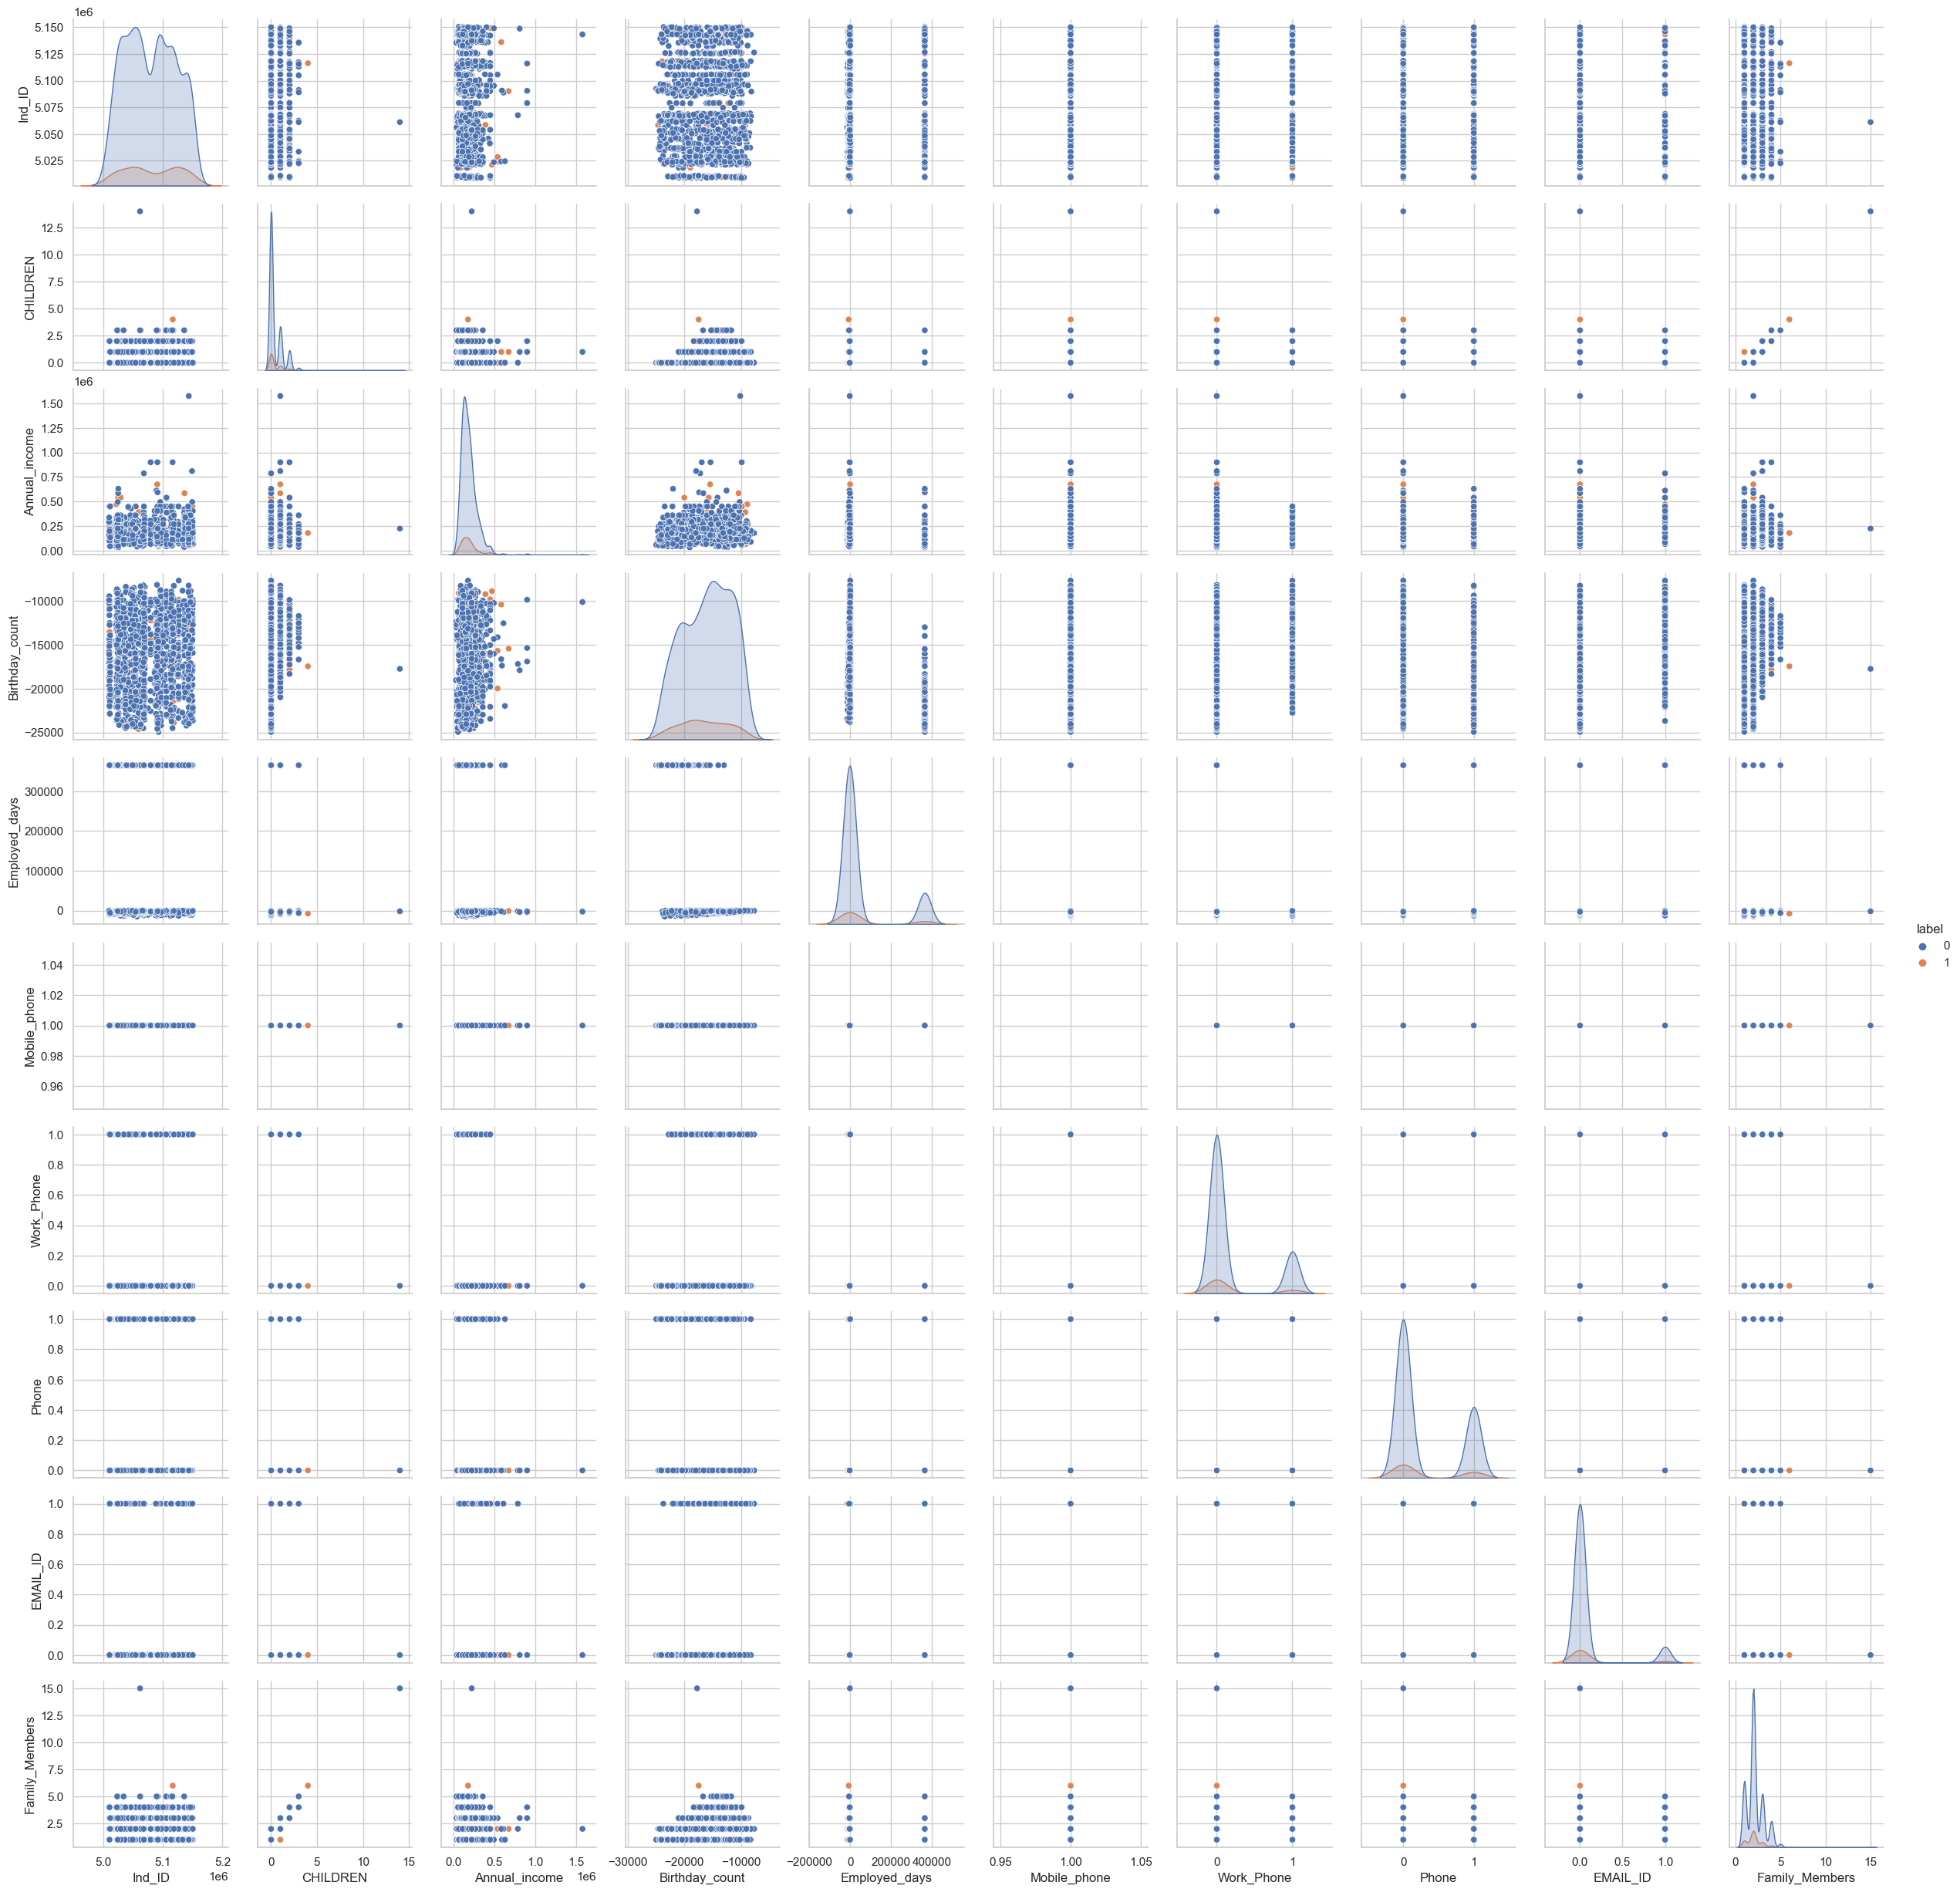

In [12]:
import seaborn as sns
sns.set(style="whitegrid")
sns.pairplot(credit,hue='label')


## encoded to binary the category data 

In [13]:
education_dummy =pd.get_dummies(credit['EDUCATION'],drop_first=True)
credit.drop(['EDUCATION'],axis=1,inplace=True)

In [14]:
housing_dummy=pd.get_dummies(credit['Housing_type'],drop_first=True)
credit.drop(['Housing_type'],axis=1,inplace=True)

In [15]:
married_dummy = pd.get_dummies(credit['Marital_status'],drop_first=True)
credit.drop(['Marital_status'],axis=1,inplace=True)

In [16]:
occupation_dummy =pd.get_dummies(credit['Type_Occupation'],drop_first=True)
credit.drop(['Type_Occupation'],axis=1,inplace=True)

In [17]:
income_dummy =pd.get_dummies(credit['Type_Income'],drop_first=True)
credit.drop(['Type_Income'],axis=1,inplace=True)

In [18]:
merged=pd.concat([credit,education_dummy,income_dummy,housing_dummy,married_dummy,occupation_dummy],axis = 1)

In [19]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# 'M' =0 & 'F'=1
merged['GENDER'] =label_encoder.fit_transform(merged['GENDER'])

In [20]:
#'YES' =1 & 'no'=0
merged['Car_Owner'] =label_encoder.fit_transform(merged['Car_Owner'])

In [21]:
#'YES' =1 & 'no'=0
merged['Propert_Owner'] =label_encoder.fit_transform(merged['Propert_Owner'])

In [22]:
merged.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,...,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff,unknown
0,5008827,1,1,1,0,180000.00000,-18772.000000,365243,1,0,...,0,0,0,0,0,0,0,0,0,1
1,5009744,0,1,0,0,315000.00000,-13557.000000,-586,1,1,...,0,0,0,0,0,0,0,0,0,1
2,5009746,0,1,0,0,315000.00000,-16040.342071,-586,1,1,...,0,0,0,0,0,0,0,0,0,1
3,5009749,0,1,0,0,191399.32623,-13557.000000,-586,1,1,...,0,0,0,0,0,0,0,0,0,1
4,5009752,0,1,0,0,315000.00000,-13557.000000,-586,1,1,...,0,0,0,0,0,0,0,0,0,1


## spliting the data & applying various machine learning model  & feature scalling 

In [23]:
from sklearn.model_selection import train_test_split
x= merged.drop('label',axis=1)
y= merged['label'] 

x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((1238, 47), (310, 47))

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler=MinMaxScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled =scaler.transform(x_test)

### implementing LogisticRegression

In [26]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
print('Training Accuracy {}'.format(logreg.score(x_train,y_train)))
print('Testing Accuracy {}'.format(logreg.score(x_test,y_test)))                                   


Training Accuracy 0.882875605815832
Testing Accuracy 0.9032258064516129


### Implementing DecisionTreeClassifier

In [27]:
from sklearn.tree import DecisionTreeClassifier
model1=DecisionTreeClassifier()
model1.fit(x_train,y_train)
print('Training Accuracy {}'.format(model1.score(x_train,y_train)))
print('Testing Accuracy {}'.format(model1.score(x_test,y_test)))                                   


Training Accuracy 1.0
Testing Accuracy 0.8806451612903226


### implementing KNeighborsClassifier 

In [28]:
from sklearn.neighbors import KNeighborsClassifier 
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)
print('Training Accuracy {}'.format(knn.score(x_train,y_train)))
print('Testing Accuracy {}'.format(knn.score(x_test,y_test)))                                   


Training Accuracy 0.938610662358643
Testing Accuracy 0.9032258064516129


C:\Users\SANTANU\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\SANTANU\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

### implementing RandomForestClassifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)
print('Training Accuracy {}'.format(model.score(x_train,y_train)))
print('Testing Accuracy {}'.format(model.score(x_test,y_test)))

Training Accuracy 1.0
Testing Accuracy 0.9387096774193548


## visualization which algorithm is best for this datasets 

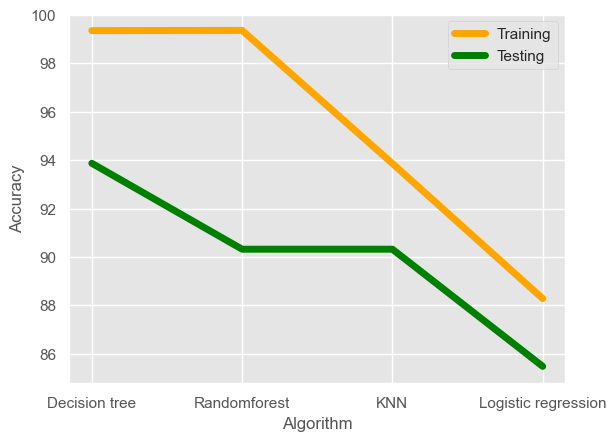

In [30]:
import matplotlib.pyplot as plt 
from matplotlib import style
style.use('ggplot')
x=['Decision tree','Randomforest','KNN','Logistic regression']
y=[99.35,99.36,93.86,88.28]
x2=['Decision tree','Randomforest','KNN','Logistic regression']
y2=[93.87,90.32,90.32,85.48]
plt.plot(x,y,linewidth=5,color='orange',label='Training')
plt.plot(x2,y2,linewidth=5,color='green',label='Testing')
plt.legend()
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.show()

In [31]:
from sklearn import metrics 
y_pred=model1.predict(x_test)

In [32]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [33]:
y_test

30      1
1514    0
1182    0
1205    0
528     0
       ..
1228    0
1065    0
1345    0
485     0
874     0
Name: label, Length: 310, dtype: int64

In [36]:
from sklearn.metrics import confusion_matrix

In [34]:
from sklearn.metrics import precision_score,recall_score

# using better evaluation technique using cross validation 

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier   
import numpy as np  


model1 =DecisionTreeClassifier() 
model1.fit(x_train, y_train)# Replace with your chosen model
k = 5  
kf = KFold(n_splits=4, shuffle=True, random_state=42)  
scores = cross_val_score(model1,x_train,y_train, cv=kf, scoring='accuracy')  
print("Cross-Validation Scores:",scores)
mean_score = np.mean(scores)
std_deviation=np.std(scores)
print(f"Mean Score: {mean_score:.2f}")
print(f"Standard Deviation: {std_deviation:.2f}")


In [ ]:
merged.head()

In [ ]:
my_list = [0 for _ in range(48)]
print(my_list)

# saving the model & using the model 

In [ ]:
from joblib import dump, load
dump(model1, 'credit_card.joblib')


In [ ]:
test_data=[[ 1, 1, 0, 17000, -18765, 34567, 1, 0, 0, 1, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]]

In [ ]:
 import joblib

# Load the trained model
loaded_model = joblib.load('credit_card.joblib')
test_predictions = loaded_model.predict(test_data)

In [ ]:
test_predictions

# THANK YOU 